# Analysis of Measurements Conducted on April 2nd
This notbook contains analysis of the data obtained on April 2nd 2025. We are analysing 4 log-files under **/logfiles/datasequence_logs/April2nd**:
* ICE_Commercial_NSA.txt --> df1
* ICE_NonCommercial_NSA.txt --> df2
* ICE_NonCommercial_SA.txt --> df3
* Telia_NSA.txt --> df4


The measurements have been conducted on three different sim-cards. For ICE we have two different sim cards, one commercial, and one sim-card not commercially available with 5G SA access. The Telia sim-card is commercially avaiable. The ICE_NonCommercial_SA.txt measurements are the only ones conducted using a Raspberry PI 4 with a quectel 5G Hat. The rest have been performed using a Samsung Galaxy S23 using G-NetTrack Pro. 

The first this we will do is read the contents of the files and do some simple formating.

In [41]:
import pandas as pd


df1 = pd.read_csv("../logfiles/datasequence_logs/April2nd/ICE_Commercial_NSA.txt", sep="\t", engine="python", on_bad_lines='skip')
df2 = pd.read_csv("../logfiles/datasequence_logs/April2nd/ICE_NonCommercial_NSA.txt", sep="\t", engine="python", on_bad_lines='skip')
df3 = pd.read_csv("../logfiles/datasequence_logs/April2nd/ICE_NonCommercial_SA.txt", sep=",", engine="python", on_bad_lines='skip')
df4 = pd.read_csv("../logfiles/datasequence_logs/April2nd/Telia_NSA.txt", sep="\t", engine="python", on_bad_lines='skip')

df1['TestName'] = 'ICE_Commercial_NSA'
df2['TestName'] = 'ICE_NonCommercial_NSA'
df3['TestName'] = 'ICE_NonCommercial_SA'
df4['TestName'] = 'Telia_NSA'

#We want to operate on mbps, so here are some simple calculations
df1['TESTDOWNLINK'] = df1['TESTDOWNLINK'] / 1000
df1['TESTUPLINK'] = df1['TESTUPLINK'] / 1000
df1['TESTDOWNLINKMAX'] = df1['TESTDOWNLINKMAX'] / 1000
df1['TESTUPLINKMAX'] = df1['TESTUPLINKMAX'] / 1000

df2['TESTDOWNLINK'] = df2['TESTDOWNLINK'] / 1000
df2['TESTUPLINK'] = df2['TESTUPLINK'] / 1000
df2['TESTDOWNLINKMAX'] = df2['TESTDOWNLINKMAX'] / 1000
df2['TESTUPLINKMAX'] = df2['TESTUPLINKMAX'] / 1000

df3['TESTUPLINK'] = df3['Upload(bps)'] / 1000000
df3['TESTDOWNLINK'] = df3['Download(bps)'] / 1000000

df4['TESTDOWNLINK'] = df4['TESTDOWNLINK'] / 1000
df4['TESTUPLINK'] = df4['TESTUPLINK'] / 1000
df4['TESTDOWNLINKMAX'] = df4['TESTDOWNLINKMAX'] / 1000
df4['TESTUPLINKMAX'] = df4['TESTUPLINKMAX'] / 1000



We now want to do some simple comparisons between the different sim-card meausrements. Firstyl we will compare their mean values before we make some illustrative plots.

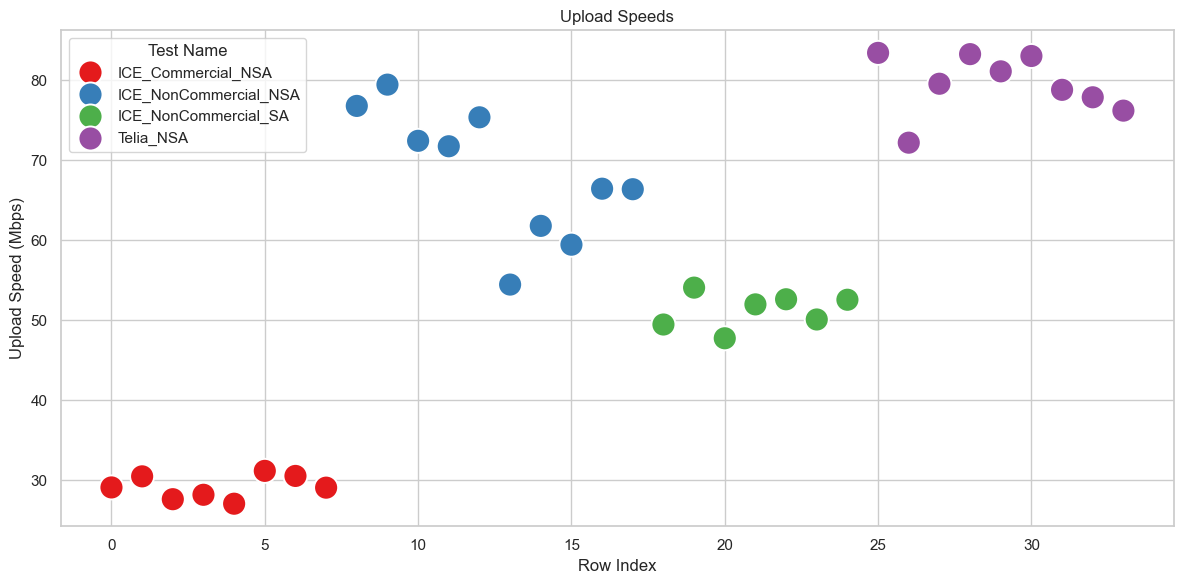

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

#Concat all the dfs 1-4 into a single df containing Uplink and Downlink columns
concat_df = pd.concat([df[['TESTDOWNLINK', 'TESTUPLINK', 'TestName']] for df in [df1, df2, df3, df4]], ignore_index=True)
concat_df["Row"] = concat_df.index


# Create scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=concat_df,
    x="Row",
    y="TESTUPLINK",
    hue="TestName",
    palette="Set1",
    s=300
)

# Customize
plt.title("Upload Speeds")
plt.xlabel("Row Index")
plt.ylabel("Upload Speed (Mbps)")
plt.legend(title="Test Name")
plt.tight_layout()
plt.show()


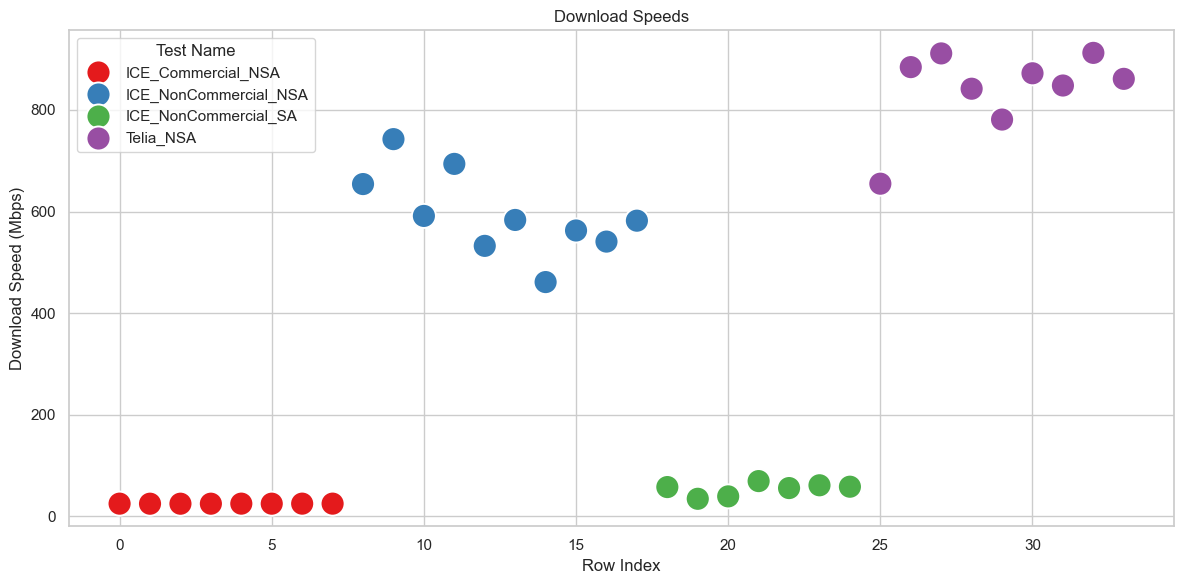

In [54]:
# Create scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=concat_df,
    x="Row",
    y="TESTDOWNLINK",
    hue="TestName",
    palette="Set1",
    s=300
)

# Customize
plt.title("Download Speeds")
plt.xlabel("Row Index")
plt.ylabel("Download Speed (Mbps)")
plt.legend(title="Test Name")
plt.tight_layout()
plt.show()